#**Challenge Telecom X: análisis de evasión de clientes - Parte 2**

##**🛠️ Preparación de los Datos**

In [8]:
# Importacion de librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

###**✅ 1. Extracción del Archivo Tratado**

---

Carga el archivo CSV que contiene los datos tratados anteriormente.

📂 Atención: Utiliza el mismo archivo que limpiaste y organizaste en la Parte 1 del desafío Telecom X. Debe contener solo las columnas relevantes, ya con los datos corregidos y estandarizados.

---

In [9]:
# 1. Cargamos el archivo CSV tratado previamente
df = pd.read_csv('/content/TelecomX_Datos_Tratados.csv')

###**✅ 2. Eliminación de Columnas Irrelevantes**

---

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

---



In [10]:
# Eliminamos identificadores únicos o columnas irrelevantes para la predicción
df = df.drop(columns=[col for col in df.columns if col.lower() == 'customerid'], errors='ignore')

###**✅ 3. Transformación de variables categóricas (One-Hot Encoding)**

In [11]:
# Identificamos variables categóricas
columnas_categoricas = ['Genero', 'TipoInternet', 'TipoContrato', 'MetodoPago']

# Aplicamos One-Hot Encoding (sin duplicar la primera categoría para evitar multicolinealidad)
df_encoded = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

###**✅ 4. Separar variable objetivo (y) y variables predictoras (X)**

In [12]:
# Definimos X e y
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

###**✅ 5. Análisis del desbalance de clases**

Proporción original:
Churn
0    73.42
1    26.58
Name: proportion, dtype: float64


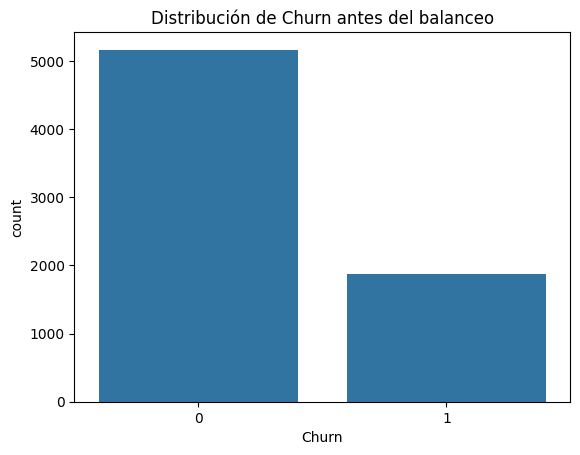

In [13]:
# Calculamos la proporción de cancelaciones vs no cancelaciones
proporcion_original = y.value_counts(normalize=True) * 100
print("Proporción original:")
print(proporcion_original.round(2))

# Visualizamos
sns.countplot(x=y)
plt.title("Distribución de Churn antes del balanceo")
plt.show()

###**✅ 6. Balanceo de clases con SMOTE (Oversampling)**

Distribución después de SMOTE:
Churn
0    5163
1    5163
Name: count, dtype: int64


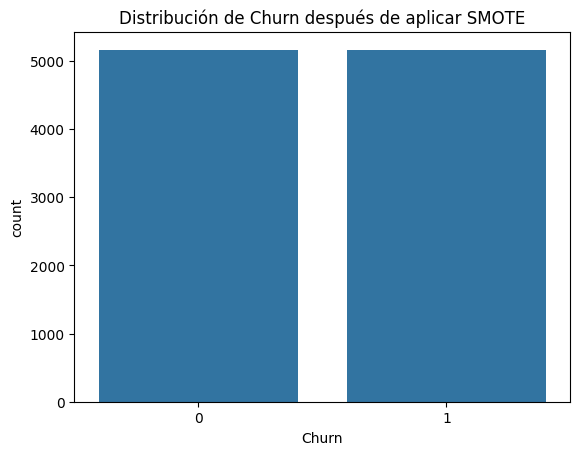

In [15]:
# Aplicamos SMOTE para balancear la clase minoritaria
smote = SMOTE(random_state=42)

# Fill missing values with the mean of each column
X_filled = X.fillna(X.mean())

# Apply SMOTE to the filled data
X_bal, y_bal = smote.fit_resample(X_filled, y)

# Revisión del nuevo balance
print("Distribución después de SMOTE:")
print(y_bal.value_counts())

# Visualizamos
sns.countplot(x=y_bal)
plt.title("Distribución de Churn después de aplicar SMOTE")
plt.show()

###**✅ 7. Estandarización de variables numéricas** **texto en negrita**

In [17]:
# Identificamos columnas numéricas
columnas_numericas = ['MesesCliente', 'CargosMensuales', 'TotalGastado', 'CargosDiarios']

# Escalamos estas columnas con StandardScaler
scaler = StandardScaler()
X_bal[columnas_numericas] = scaler.fit_transform(X_bal[columnas_numericas])

##**✅ 8. Validación de balanceo final**

In [18]:
proporcion_balanceada = y_bal.value_counts(normalize=True) * 100
print("Proporción después del balanceo:")
print(proporcion_balanceada.round(2))

Proporción después del balanceo:
Churn
0    50.0
1    50.0
Name: proportion, dtype: float64
